In [1]:
import pandas as pd
df = pd.read_csv('mydata/movie/train.csv', index_col='id')
#df.dtypes
#df.head(5)

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
id,,,,,,,,,,,,,,,,,,,,,
1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include=numerics)
newdf.head(2)
for column_name in newdf.columns:
    var = column_name
    target = 'revenue'
    data = pd.concat([newdf[target], newdf[var]], axis=1)
    data.plot.scatter(x=var, y=target);

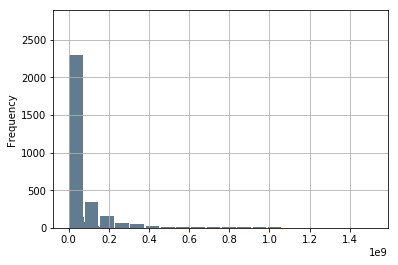

In [3]:
newdf.head()
for column_name in newdf.columns:
    var = column_name
    newdf[var].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e');


In [4]:
import numpy as np
corrmat = newdf.corr()
corrmat

,budget,popularity,runtime,revenue
budget,1.000000,0.342356,0.238373,0.752965
popularity,0.342356,1.000000,0.133690,0.461460
runtime,0.238373,0.133690,1.000000,0.216380
revenue,0.752965,0.461460,0.216380,1.000000


C:\Users\FArnold\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


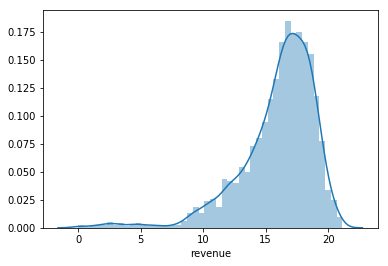

In [5]:
#sns.distplot(np.log(newdf[target]))

4.427397260273972

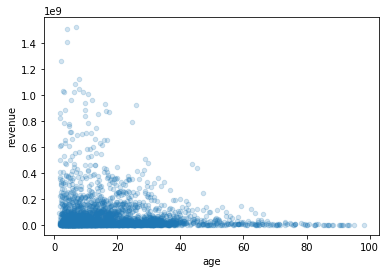

In [22]:
#Numeric Age feature
import datetime
from datetime import date
from dateutil import parser

date_str = '10/10/14' # The date - 29 Dec 2017
format_str = '%m/%d/%y' # The format

df.loc[:,'age'] = [((date.today() - datetime.datetime.strptime(element, format_str).date()).days / 365) for element in df['release_date']]
df.loc[df.age < 0,'age'] = df.loc[df.age < 0,'age'] + 100

df_Age = df.drop('age', axis=1)


In [ ]:
dataAge.head(2)

data = pd.concat([df[target], df['age']], axis=1)
data.plot.scatter(x='age', y=target, alpha=0.2);

In [ ]:
newdf.describe().isna().sum()

In [23]:
#Genre Feature
genres_df = df[['genres']]
genres_df['genres_test'] = genres_df['genres']
# genres_df['number_genres'] = genres_df.genres.str.count("'id'").fillna(0.0).astype(int)
genres_df.genres_test = genres_df.genres_test.str.strip('[]')
genres_df.genres_test[genres_df.genres_test.isnull()] = ''
genres_list = pd.Series(list(set(", ".join(genres_df.genres_test.unique().tolist()).split('}, ')))).str.split("'name': '").str[1].str.split("'").str[0].tolist()

for i, genre in enumerate(genres_list):
    genres_df[genre] = False
    genres_df[genre][genres_df.genres_test.str.contains(genre)] = True
#genres_df.drop(columns=['revenue', 'genres', 'genres_test'], inplace=True)
# genres_boxplot = genres_df.boxplot(figsize=(15, 10), rot=90)
genres_df.drop(['genres_test', 'genres'], axis=1)
genres_df.head(2)


C:\Users\FArnold\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\FArnold\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
C:\Users\FArnold\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:7620: SettingWithCopyWarning: 
A value is trying to be set on a copy of

,genres,genres_test,Adventure,Documentary,Comedy,Mystery,Fantasy,Animation,History,Western,...,Horror,Music,Crime,Foreign,Drama,Family,TV Movie,Thriller,Science Fiction,War
id,,,,,,,,,,,,,,,,,,,,,
1,"[{'id': 35, 'name': 'Comedy'}]","{'id': 35, 'name': 'Comedy'}",False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name...",False,False,True,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False


In [ ]:
for i, genre in enumerate(genres_list):
    genres_df[genre] = False
    genres_df[genre][genres_df.genres_test.str.contains(genre)] = True
#genres_df.drop(columns=['revenue', 'genres', 'genres_test'], inplace=True)
# genres_boxplot = genres_df.boxplot(figsize=(15, 10), rot=90)
genres_df

In [ ]:
avg = []
for i, genre in enumerate(genres_list):
    avg.append([genre, genres_df.loc[genres_df[genre]==True].revenue.mean()])
print(avg)

In [ ]:
import numpy as np                                                               
import matplotlib.pyplot as plt

labels, ys = zip(*avg)
xs = np.arange(len(labels)) 

fig, ax = plt.subplots()
ax.barh(xs, ys, align='center')

plt.yticks(xs, labels)